# 2D Poisson equation, Finite Difference
_Gilbert François Duivesteijn_

Let's consider:

\begin{align}
\frac{\partial u}{\partial t} + U \cdot \nabla u = \kappa \nabla^2 u + f
\end{align}
where
\begin{align}
 \nabla^2 &\equiv \frac{\partial^2}{\partial x^2} + \frac{\partial^2}{\partial y^2} \\
   \nabla &\equiv \left( \frac{\partial}{\partial x}, \frac{\partial}{\partial y} \right)
\end{align}
and $U$, $\kappa > 0$, $f$ given functions of $(x,y)$. 

For the Poisson equation, 

In [39]:
import numpy as np
import matplotlib.pyplot as plt

In [40]:
nx = 4
ny = 4
dx = 1/(nx-1)
dy = 1/(ny-1)

In [41]:
# i,j
diag_block = np.eye(ny-1)*(-2/dx**2 + -2/dy**2)
diag_block

# i, j+1
diag_block = diag_block + np.diag(np.ones(shape=(ny-2,))*1/dy**2, 1)

# i,j-1
diag_block = diag_block + np.diag(np.ones(shape=(ny-2,))*1/dy**2, -1)

diag_block

array([[-36.,   9.,   0.],
       [  9., -36.,   9.],
       [  0.,   9., -36.]])

In [42]:
Matrix = np.kron(np.eye(nx-1), diag_block)
Matrix = Matrix + np.diag(np.ones((nx-2)*(ny-1),)*1/dx**2, ny-1)
Matrix = Matrix + np.diag(np.ones((nx-2)*(ny-1),)*1/dx**2, -(ny-1))

In [43]:
Matrix

array([[-36.,   9.,   0.,   9.,   0.,   0.,   0.,   0.,   0.],
       [  9., -36.,   9.,   0.,   9.,   0.,   0.,   0.,   0.],
       [  0.,   9., -36.,   0.,   0.,   9.,   0.,   0.,   0.],
       [  9.,   0.,   0., -36.,   9.,   0.,   9.,   0.,   0.],
       [  0.,   9.,   0.,   9., -36.,   9.,   0.,   9.,   0.],
       [  0.,   0.,   9.,   0.,   9., -36.,   0.,   0.,   9.],
       [  0.,   0.,   0.,   9.,   0.,   0., -36.,   9.,   0.],
       [  0.,   0.,   0.,   0.,   9.,   0.,   9., -36.,   9.],
       [  0.,   0.,   0.,   0.,   0.,   9.,   0.,   9., -36.]])

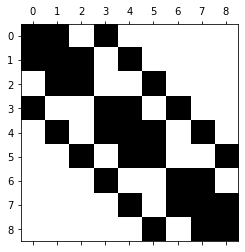

In [44]:
plt.figure()
plt.spy(Matrix)
plt.show()